In [302]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from yelp.client import Client
import json
from ratelimit import limits
import requests
import csv
import random
from keys import my_api_key


In [303]:
df = pd.read_csv("../sub-est2019_all.csv", engine='python')
rural_city = df[(df["POPESTIMATE2019"]< 50000) & (df["POPESTIMATE2019"] > 1000) & (df["PRIMGEO_FLAG"]==0)]
rural_df = rural_city[["NAME", "STNAME", "POPESTIMATE2019"]]
urban_city = df[df["POPESTIMATE2019"]>= 50000]
urban_df = urban_city[["NAME", "STNAME", "POPESTIMATE2019"]]
urban_index = urban_df.loc[urban_df["NAME"] == urban_df["STNAME"]].index
urban_clean = urban_df.drop(urban_index)
random_urban_city = urban_clean[["NAME", "STNAME","POPESTIMATE2019"]].sample(n=100, random_state=1)
random_rural_city = rural_df[["NAME", "STNAME", "POPESTIMATE2019"]].sample(n=100, random_state=1)

In [306]:
headers = {'Authorization': 'Bearer %s' % my_api_key}

rural_dict = {
    "Searched": [],
    "City": [],
    "State": [],
    "Lat": [],
    "Lng": [],
    "Restaurant": [],
    "Category": [],
#     "Category 2": [],
#     "Category 3": [],
    "Transactions":[]
}

url='https://api.yelp.com/v3/businesses/search'
offset = np.arange(0,950,50).tolist() 

for city, state in zip(random_rural_city["NAME"], random_rural_city["STNAME"]):
    for i in range(len(offset)):
        params = {
            'location': f"{city}, {state}",
            'radius': 8047,
            'limit': 50,
            'offset': offset[i]
                 }
        response = requests.get(url, params = params, headers = headers).json()
        try:
            for business in range(len(response["businesses"])):
                try:
                    rural_dict["Searched"].append(f"{city}, {state}")
                    rural_dict["City"].append(response["businesses"][business]["location"]["city"])
                    rural_dict["State"].append(response["businesses"][business]["location"]["state"])
                    rural_dict["Lat"].append(response["businesses"][business]["coordinates"]["latitude"])
                    rural_dict["Lng"].append(response["businesses"][business]["coordinates"]["longitude"])
                    rural_dict["Restaurant"].append(response["businesses"][business]["name"])
                    rural_dict["Category"].append([response["businesses"][business]["categories"][i]["title"] for i in range(len(response["businesses"][business]["categories"]))])
#                     rural_dict["Category"].append(response["businesses"][business]["categories"][0]["title"])
#                     rural_dict["Category 2"].append(response["businesses"][business]["categories"][1]["title"])
#                     rural_dict["Category 3"].append(response["businesses"][business]["categories"][2]["title"])
                    rural_dict["Transactions"].append(response["businesses"][business]["transactions"])
                except KeyError:
                    rural_dict["Searched"].append("No City Found")
                    rural_dict["City"].append("No City Found")
                    rural_dict["State"].append("No State Found")
                    rural_dict["Lat"].append("No Lat Found")
                    rural_dict["Lng"].append("No Lng Found")
                    rural_dict["Restaurant"].append("No Restaurant Found")
                    rural_dict["Category"].append("No Categories")
                    rural_dict["Transactions"].append("No Transactions Found")
#                 except IndexError:
#                     rural_dict["Category 2"].append("")
#                     rural_dict["Category 3"].append("")
        except KeyError:
                pass

In [307]:
rural = pd.DataFrame.from_dict(rural_dict, orient='index')
rural = rural.transpose()

In [309]:
headers = {'Authorization': 'Bearer %s' % my_api_key}

urban_dict = {
    "Searched": [],
    "City": [],
    "State": [],
    "Lat": [],
    "Lng": [],
    "Restaurant": [],
    "Category": [],
#     "Category 2": [],
#     "Category 3": [],
    "Transactions":[]
}

url='https://api.yelp.com/v3/businesses/search'
offset = np.arange(0,950,50).tolist() 

for city, state in zip(random_urban_city["NAME"], random_urban_city["STNAME"]):
    for i in range(len(offset)):
        params = {
            'location': f"{city}, {state}",
            'radius': 8047,
            'limit': 50,
            'offset': offset[i]
                 }
        response = requests.get(url, params = params, headers = headers).json()
        try:
            for business in range(len(response["businesses"])):
                try:
                    urban_dict["Searched"].append(f"{city}, {state}")
                    urban_dict["City"].append(response["businesses"][business]["location"]["city"])
                    urban_dict["State"].append(response["businesses"][business]["location"]["state"])
                    urban_dict["Lat"].append(response["businesses"][business]["coordinates"]["latitude"])
                    urban_dict["Lng"].append(response["businesses"][business]["coordinates"]["longitude"])
                    urban_dict["Restaurant"].append(response["businesses"][business]["name"])
                    urban_dict["Category"].append([response["businesses"][business]["categories"][i]["title"] for i in range(len(response["businesses"][business]["categories"]))])
#                     rural_dict["Category"].append(response["businesses"][business]["categories"][0]["title"])
#                     rural_dict["Category 2"].append(response["businesses"][business]["categories"][1]["title"])
#                     rural_dict["Category 3"].append(response["businesses"][business]["categories"][2]["title"])
                    urban_dict["Transactions"].append(response["businesses"][business]["transactions"])
                except KeyError:
                    urban_dict["Searched"].append("No City Found")
                    urban_dict["City"].append("No City Found")
                    urban_dict["State"].append("No State Found")
                    urban_dict["Lat"].append("No Lat Found")
                    urban_dict["Lng"].append("No Lng Found")
                    urban_dict["Restaurant"].append("No Restaurant Found")
                    urban_dict["Category"].append("No Categories")
                    urban_dict["Transactions"].append("No Transactions Found")
#                 except IndexError:
#                     rural_dict["Category 2"].append("")
#                     rural_dict["Category 3"].append("")
        except KeyError:
                pass

In [310]:
urban = pd.DataFrame.from_dict(urban_dict, orient='index')
urban = urban.transpose()

In [311]:
urban.to_csv("../urban.csv")
rural.to_csv("../rural.csv")

In [353]:
rural_cat= pd.DataFrame(rural["Category"].to_list(), columns = ["Category 1", "Category 2", "Category 3", "Category 4"], index = rural.index)
rural_cats = rural_cat[["Category 1", "Category 2", "Category 3"]]
rural_clean = rural.merge(rural_cats, left_index = True,right_index = True)
rural_clean

,Searched,City,State,Lat,Lng,Restaurant,Category,Transactions,Category 1,Category 2,Category 3
0,"Oran city, Missouri",Benton,MO,37.1274,-89.5935,Schindler's Tavern,"[American (Traditional), Bars]",[],American (Traditional),Bars,None
1,"Jackson city, Ohio",Jackson,OH,39.053,-82.6388,Arch & Eddies Gathering House,"[American (New), Bars, Sandwiches]",[],American (New),Bars,Sandwiches
2,"Jackson city, Ohio",Jackson,OH,39.0512,-82.6357,The Spot on Main,"[Coffee & Tea, Cafes, Bakeries]",[pickup],Coffee & Tea,Cafes,Bakeries
3,"Jackson city, Ohio",Jackson,OH,39.0522,-82.6377,Michael's Ice Cream,"[Ice Cream & Frozen Yogurt, Pizza, Sandwiches]",[],Ice Cream & Frozen Yogurt,Pizza,Sandwiches
4,"Jackson city, Ohio",Jackson,OH,38.9751,-82.6378,Four Mile Bakery & General Store,"[Donuts, Bakeries, Fireplace Services]",[],Donuts,Bakeries,Fireplace Services
...,...,...,...,...,...,...,...,...,...,...,...
15022,"Whitaker borough, Pennsylvania",Pittsburgh,PA,40.4634,-79.8244,KFC,"[Fast Food, Chicken Wings, Chicken Shop]","[delivery, pickup]",Fast Food,Chicken Wings,Chicken Shop
15023,"Whitaker borough, Pennsylvania",West Mifflin,PA,40.3431,-79.9466,Walmart Bakery,[Bakeries],[],Bakeries,None,None
15024,"Whitaker borough, Pennsylvania",Pittsburgh,PA,40.4669,-79.8374,MA'S HONEY,[Breakfast & Brunch],"[delivery, pickup]",Breakfast & Brunch,None,None
15025,"Whitaker borough, Pennsylvania",Pleasant Hills,PA,40.3331,-79.9441,Subway,[Sandwiches],[],Sandwiches,None,None


In [354]:
urban_cat= pd.DataFrame(urban["Category"].to_list(), columns = ["Category 1", "Category 2", "Category 3", "Category 4"], index = urban.index)
urban_cats = urban_cat[["Category 1", "Category 2", "Category 3"]]
urban_clean = urban.merge(urban_cats, left_index = True,right_index = True)


In [355]:
keywords = ["Vegan", "vegan"]
rural_vegan = rural_clean[(rural_clean["Category 1"].isin(keywords))|(rural_clean["Category 2"].isin(keywords))|(rural_clean["Category 3"].isin(keywords))]
urban_vegan = urban_clean[(urban_clean["Category 1"].isin(keywords))|(urban_clean["Category 2"].isin(keywords))|(urban_clean["Category 3"].isin(keywords))]

In [356]:
rural_clean["Vegan Options"] = np.where(rural_clean["Category 1"].isin(keywords)|rural_clean["Category 2"].isin(keywords)|rural_clean["Category 3"].isin(keywords), 1, 0)
rural_clean.to_csv("../Data Pull/rural_clean.csv")

In [358]:
urban_clean["Vegan Options"] = np.where(urban_clean["Category 1"].isin(keywords)|urban_clean["Category 2"].isin(keywords)|urban_clean["Category 3"].isin(keywords), 1, 0)
urban_clean.to_csv("../Data Pull/urban_clean.csv")

In [359]:
urban_clean.to_csv("../Data Pull/urban_clean.csv")
rural_clean.to_csv("../Data Pull/rural_clean.csv")

In [372]:
df["Searched"] = df["NAME"] + ", " + df["STNAME"]

In [373]:
rural_clean_pop = pd.merge(rural_clean, df[["POPESTIMATE2019", "Searched"]],  how='left', on= "Searched")
urban_clean_pop = pd.merge(urban_clean, df[["POPESTIMATE2019", "Searched"]],  how='left', on= "Searched")
urban_clean_pop.drop_duplicates(subset = ['Searched', 'Restaurant'], keep = 'first')
rural_clean_pop.drop_duplicates(subset = ['Searched', 'Restaurant'], keep = 'first')
urban_clean_pop.to_csv("../Data Pull/urban_clean_pop.csv")
rural_clean_pop.to_csv("../Data Pull/rural_clean_pop.csv")

In [396]:
rural_group = rural_clean_pop.groupby("Searched")

rural_rest_count = rural_group["Restaurant"].count()
rural_vegan_count = rural_group["Vegan Options"].sum()
rural_pop = rural_group["POPESTIMATE2019"].max()
vegan_pct = rural_vegan_count/rural_rest_count * 100
vegan_percap = rural_vegan_count/rural_pop

rural_summary = pd.DataFrame({
    "Population" : rural_pop,
    "Total Restaurants" : rural_rest_count,
    "Vegan Restaurants" : rural_vegan_count,
    "% Vegan Restaurants" : vegan_pct,
    "Vegan Restaurants per capita" : vegan_percap
})

# rural_summary["% Vegan Options"] = rural_summary["% Vegan Options"].map("{:.0f}%".format)
rural_summary = rural_summary.reset_index()
rural_summary.to_csv("../Data Pull/rural_summary.csv")

In [397]:
urban_group = urban_clean_pop.groupby("Searched")

urban_rest_count = urban_group["Restaurant"].count()
urban_vegan_count = urban_group["Vegan Options"].sum()
urban_pop = urban_group["POPESTIMATE2019"].max()
vegan_pct = urban_vegan_count/urban_rest_count * 100
vegan_percap = urban_vegan_count/urban_pop

urban_summary = pd.DataFrame({
    "Population" : urban_pop,
    "Total Restaurants" : urban_rest_count,
    "Vegan Restaurants" : urban_vegan_count,
    "% Vegan Restaurants" : vegan_pct,
    "Vegan Restaurants per capita" : vegan_percap
})

# urban_summary["% Vegan Options"] = urban_summary["% Vegan Options"].map("{:.0f}%".format)

urban_summary.to_csv("../Data Pull/urban_summary.csv")
urban_summary = urban_summary.reset_index()
urban_summary


,Searched,Population,Total Restaurants,Vegan Restaurants,% Vegan Restaurants,Vegan Restaurants per capita
0,"Allentown city, Pennsylvania",121442,587,3,0.511073,0.000025
1,"Ames city, Iowa",66258,199,2,1.005025,0.000030
2,"Antioch city, California",111502,411,1,0.243309,0.000009
3,"Apple Valley city, Minnesota",55135,259,0,0.000000,0.000000
4,"Arvada city, Colorado",121272,825,4,0.484848,0.000033
...,...,...,...,...,...,...
93,"Waterloo city, Iowa",67328,175,0,0.000000,0.000000
94,"West Covina city, California",105101,950,7,0.736842,0.000067
95,"West Sacramento city, California",53519,950,15,1.578947,0.000280
96,"Westland city, Michigan",81511,504,1,0.198413,0.000012


In [391]:
urban_tot_cities = urban_summary["Searched"].nunique()
urban_tot_pop = urban_summary["Population"].mean()
urban_tot_rest = urban_summary["Total Restaurants"].mean()
urban_tot_vegan = urban_summary["Vegan Restaurants"].mean()
urban_tot_per = urban_summary["% Vegan Restaurants"].mean()
urban_tot_percap = urban_summary["Vegan Restaurants per capita"].mean()

urban_tot_summary = pd.DataFrame({
    "Tot Cities": urban_tot_cities,
    "Tot Population": round(urban_tot_pop),
    "Tot Restaurants": round(urban_tot_rest),
    "Tot Vegan Restaurants": round(urban_tot_vegan),
    "Tot % Vegan Restaurants": urban_tot_per,
    "Tot Vegan Restaurants per capita": urban_tot_percap
     
}, index = ["Total"])

urban_tot_summary["Tot % Vegan Restaurants"] = urban_tot_summary["Tot % Vegan Restaurants"].map("{:.2f}%".format)
urban_tot_summary



,Tot Cities,Tot Population,Tot Restaurants,Tot Vegan Restaurants,Tot % Vegan Restaurants,Tot Vegan Restaurants per capita
Total,98,125847,558,4,0.49%,0.000035


In [392]:
rural_tot_cities = rural_summary["Searched"].nunique()
rural_tot_pop = rural_summary["Population"].mean()
rural_tot_rest = rural_summary["Total Restaurants"].mean()
rural_tot_vegan = rural_summary["Vegan Restaurants"].mean()
rural_tot_per = rural_summary["% Vegan Restaurants"].mean()
rural_tot_percap = rural_summary["Vegan Restaurants per capita"].mean()

rural_tot_summary = pd.DataFrame({
    "Tot Cities": rural_tot_cities,
    "Tot Population": round(rural_tot_pop),
    "Tot Restaurants": round(rural_tot_rest),
    "Tot Vegan Restaurants": round(rural_tot_vegan),
    "Tot % Vegan Restaurants": rural_tot_per,
    "Tot Vegan Restaurants per capita": rural_tot_percap
     
}, index = ["Total"])

rural_tot_summary["Tot % Vegan Restaurants"] = rural_tot_summary["Tot % Vegan Restaurants"].map("{:.2f}%".format)
rural_tot_summary


,Tot Cities,Tot Population,Tot Restaurants,Tot Vegan Restaurants,Tot % Vegan Restaurants,Tot Vegan Restaurants per capita
Total,97,7419,155,1,0.34%,0.000242


## Pie Charts

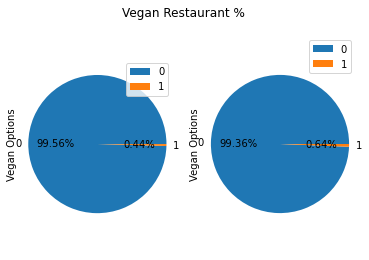

In [405]:
rural_veg_group = rural_clean_pop.groupby("Vegan Options")
urban_veg_group = urban_clean_pop.groupby("Vegan Options")
rural_veg = rural_veg_group["Vegan Options"].count()
urban_veg = urban_veg_group["Vegan Options"].count()
all_veg = pd.concat([rural_veg, urban_veg], axis=1)
all_labels = ["non-vegan", "vegan"]
all_veg.plot(kind = "pie", title = "Vegan Restaurant %", label = all_labels, subplots = True, autopct = "%1.2f%%")
plt.axis("equal")
plt.show()


## Scatter plot

The correlation coefficient is 0.24


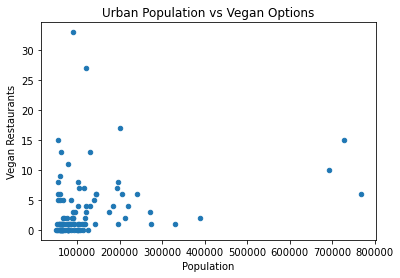

In [421]:
urban_scatter = urban_summary[["Population", "Vegan Restaurants"]]
urban_scatter.plot(x="Population", y = "Vegan Restaurants", kind = "scatter", title = "Urban Population vs Vegan Options")
correlation = st.pearsonr(urban_summary["Population"], urban_summary["Vegan Restaurants"])
print(f"The correlation coefficient is {round(correlation[0],2)}")
plt.show()

The r-value is: 0.23898248298784278


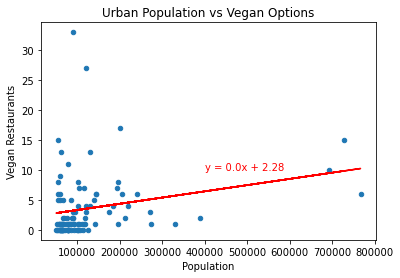

In [423]:
x = urban_summary["Population"]
y = urban_summary["Vegan Restaurants"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = slope * x + intercept
eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
urban_scatter.plot(x = "Population", y = "Vegan Restaurants", kind = "scatter", title = "Urban Population vs Vegan Options")
plt.plot(x, regress, "r-")
plt.annotate(eq, (400000,10), color ="r")
print(f"The r-value is: {rvalue}")
plt.show()

The correlation coefficient is 0.0


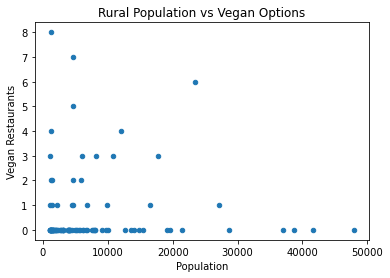

In [414]:
rural_scatter = rural_summary[["Population", "Vegan Restaurants"]]
rural_scatter.plot(x="Population", y = "Vegan Restaurants", kind = "scatter", title = "Rural Population vs Vegan Options")
correlation = st.pearsonr(rural_summary["Population"], rural_summary["Vegan Restaurants"])
print(f"The correlation coefficient is {round(correlation[0],2)}")
plt.show()

The r-value is: 0.000591383688402626


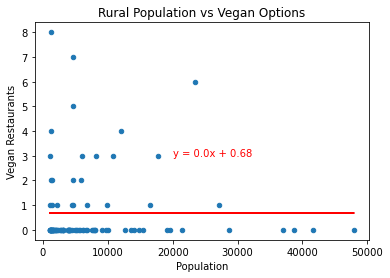

In [415]:
x = rural_summary["Population"]
y = rural_summary["Vegan Restaurants"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = slope * x + intercept
eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
rural_scatter.plot(x = "Population", y = "Vegan Restaurants", kind = "scatter", title = "Rural Population vs Vegan Options")
plt.plot(x, regress, "r-")
plt.annotate(eq, (20000,3), color ="r")
print(f"The r-value is: {rvalue}")
